<a href="https://colab.research.google.com/github/Dabi1021/Insurance_cost/blob/main/230925_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B82(%EC%B4%9D%ED%95%A9)_insurancecost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 가져오기

In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/팀프로젝트/insurance_cost/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# 데이터 확인

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## 결측치 확인

In [4]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# 데이터 변환

##lambda로 라벨엔코더 실시

In [5]:
# 지역기준
# array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)
for idx, region in enumerate(df['region'].unique()):
    df['region'] = df['region'].replace(region, str(idx))
df['region'] = df['region'].astype(int)

In [6]:
# 흡연기준
conditions = [
    (df['smoker'] == 'yes'),
    (df['smoker'] == 'no')
]
choices = [0, 1]
df['smoker'] = np.select(conditions, choices, default=np.nan)

In [7]:
# 성별기준
conditions = [
    (df['sex'] == 'male'),
    (df['sex'] == 'female')
]
choices = [0, 1]
df['sex'] = np.select(conditions, choices, default=np.nan)

## 나이별 카테고리화 실시

In [8]:
ages = [18]
number = 1

while ages[-1] <= 64:
    next_age = ages[-1] + 5
    ages.append(next_age)
ages = ages[0:9]

In [9]:
for age in ages:
    df['age_cate'] = df.apply(lambda row: str(age) + '__5+' if (row['age'] >= age) and (row['age'] <= age + 5) else row.get('age_cate', ''), axis=1)

# EDA

In [10]:
# 성별 흡연율
df.groupby('sex')['smoker'].value_counts(10)

sex  smoker
0.0  1.0       0.764793
     0.0       0.235207
1.0  1.0       0.826284
     0.0       0.173716
Name: smoker, dtype: float64

In [11]:
# 담배를 피지 않고 남성일때, 지역 기준 bmi 평균
df[(df['smoker']==1) & (df['sex']==0)].groupby('region')['bmi'].mean(), df[(df['smoker']==1) & (df['sex']==0)].groupby('region')['charges'].mean()

(region
 0    31.019841
 1    34.129552
 2    28.930379
 3    28.861760
 Name: bmi, dtype: float64,
 region
 0    7778.905534
 1    7609.003587
 2    8320.689321
 3    8664.042222
 Name: charges, dtype: float64)

In [12]:
# 담배를 피고 않고 남성일때, 자녀수에 따른 보험청구액
df[(df['smoker']==0) & (df['sex']==0)].groupby('children')['charges'].mean()

children
0    31902.398075
1    32904.876848
2    35297.837461
3    33869.169434
4    26532.276933
Name: charges, dtype: float64

In [13]:
# 남성일때 아이가 없을 떄, 나이별 인구수
df[(df['sex']==0) & (df['children']==0)]['age_cate'].value_counts()

18__5+    76
58__5+    46
23__5+    38
53__5+    38
48__5+    23
33__5+    16
28__5+    16
38__5+    13
43__5+    12
           7
Name: age_cate, dtype: int64

In [14]:
# 남성일때 아이가 하나라도 있을떄, 나이별 인구수
df[(df['sex']==0) & (df['children']>0)]['age_cate'].value_counts()

43__5+    58
28__5+    53
38__5+    53
33__5+    49
48__5+    48
18__5+    40
23__5+    34
53__5+    29
58__5+    23
           4
Name: age_cate, dtype: int64

In [15]:
# 여성일때 아이가 없을 떄, 나이별 인구수
df[(df['sex']==1) & (df['children']==0)]['age_cate'].value_counts()

18__5+    76
58__5+    52
23__5+    34
53__5+    25
28__5+    23
48__5+    23
43__5+    18
33__5+    18
38__5+    14
           6
Name: age_cate, dtype: int64

In [16]:
# 여성일때 아이가 하나라도 있을떄, 나이별 인구수
df[(df['sex']==1) & (df['children']>0)]['age_cate'].value_counts()

43__5+    53
38__5+    51
48__5+    50
33__5+    44
28__5+    43
53__5+    42
23__5+    34
18__5+    30
58__5+    21
           5
Name: age_cate, dtype: int64

In [17]:
# 남성일 떄 아이가 있고 지역별 인구비율
df[(df['sex']==0) & (df['children']>0)].groupby('age_cate')['region'].value_counts(5)

age_cate  region
          1         0.500000
          0         0.250000
          2         0.250000
18__5+    1         0.325000
          2         0.250000
          0         0.225000
          3         0.200000
23__5+    0         0.323529
          2         0.235294
          3         0.235294
          1         0.205882
28__5+    2         0.264151
          0         0.245283
          1         0.245283
          3         0.245283
33__5+    1         0.265306
          2         0.265306
          0         0.244898
          3         0.224490
38__5+    2         0.301887
          1         0.264151
          3         0.245283
          0         0.188679
43__5+    1         0.310345
          3         0.258621
          0         0.224138
          2         0.206897
48__5+    2         0.270833
          3         0.270833
          1         0.250000
          0         0.208333
53__5+    0         0.344828
          1         0.310345
          2         0.1724

In [18]:
#여성성일 떄 아이가 있고 지역별 인구비율
df[(df['sex']==1) & (df['children']>0)].groupby('age_cate')['region'].value_counts(5)

age_cate  region
          0         0.400000
          1         0.200000
          2         0.200000
          3         0.200000
18__5+    2         0.333333
          1         0.266667
          0         0.233333
          3         0.166667
23__5+    1         0.294118
          3         0.264706
          2         0.235294
          0         0.205882
28__5+    1         0.325581
          2         0.279070
          3         0.209302
          0         0.186047
33__5+    0         0.318182
          3         0.250000
          1         0.227273
          2         0.204545
38__5+    3         0.274510
          2         0.254902
          0         0.235294
          1         0.235294
43__5+    0         0.301887
          1         0.283019
          2         0.207547
          3         0.207547
48__5+    2         0.280000
          1         0.260000
          3         0.240000
          0         0.220000
53__5+    0         0.261905
          2         0.2619

# df_1 라벨 기준


In [21]:
df_1 = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/팀프로젝트/insurance_cost/insurance.csv')
df_1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [22]:
df_1.groupby('region')['bmi'].mean()

region
northeast    29.173503
northwest    29.199785
southeast    33.355989
southwest    30.596615
Name: bmi, dtype: float64

In [23]:
for age in ages:
    df_1['age_cate'] = df_1.apply(lambda row: str(age) + '__5+' if (row['age'] >= age) and (row['age'] <= age + 5) else row.get('age_cate', ''), axis=1)

### 나이별, 지역별 특징

In [24]:
# 나이별 bmi 평균
df_1.groupby('age_cate')['bmi'].mean()

age_cate
          32.976136
18__5+    29.973423
23__5+    29.810714
28__5+    30.172111
33__5+    30.685079
38__5+    30.198244
43__5+    30.567766
48__5+    31.615972
53__5+    31.186157
58__5+    31.736901
Name: bmi, dtype: float64

In [25]:
# 북서부 나이별 bmi 평균
df_1[df_1['region'] == 'northwest'].groupby('age_cate')['bmi'].mean()

age_cate
          30.514000
18__5+    28.992273
23__5+    27.524853
28__5+    28.338788
33__5+    29.407097
38__5+    29.447031
43__5+    29.236250
48__5+    30.169286
53__5+    30.328030
58__5+    29.300714
Name: bmi, dtype: float64

In [26]:
# 남동부 나이별 bmi 평균
df_1[df_1['region'] == 'southeast'].groupby('age_cate')['bmi'].mean()

age_cate
          34.031250
18__5+    33.359683
23__5+    33.359730
28__5+    33.738158
33__5+    33.126667
38__5+    31.766216
43__5+    33.425897
48__5+    33.896923
53__5+    33.493333
58__5+    33.835405
Name: bmi, dtype: float64

In [27]:
# 남서부 나이별 bmi 평균
df_1[df_1['region'] == 'southwest'].groupby('age_cate')['bmi'].mean()

age_cate
          32.980000
18__5+    28.588462
23__5+    29.720588
28__5+    29.859375
33__5+    31.881250
38__5+    30.687097
43__5+    29.628571
48__5+    31.191429
53__5+    31.202941
58__5+    33.294286
Name: bmi, dtype: float64

In [28]:
# 지역별, 아이가 있을때 bmi 평균
df_1[df_1['children']>0].groupby('age_cate')['bmi'].mean()

age_cate
          32.501111
18__5+    28.833643
23__5+    30.558456
28__5+    30.425208
33__5+    31.156774
38__5+    29.741106
43__5+    30.489730
48__5+    32.184898
53__5+    31.282535
58__5+    32.543182
Name: bmi, dtype: float64

In [29]:
# 지역별, 아이가 없을떄 bmi 평균
df_1[df_1['children']==0].groupby('age_cate')['bmi'].mean()

age_cate
          33.305000
18__5+    30.498322
23__5+    29.104514
28__5+    29.549103
33__5+    29.394853
38__5+    31.959074
43__5+    30.856500
48__5+    30.403913
53__5+    31.077540
58__5+    31.374898
Name: bmi, dtype: float64

## 엔코더

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
le = LabelEncoder()
le.fit(df_1['bmi_cate'])
df_1['bmi_cate_encoded'] = le.transform(df_1['bmi_cate'])

In [ ]:
df_1[(df_1['age']< 28) & (df_1['children'] > 0)]['region'].value_counts(10)

southeast    0.275362
northwest    0.260870
southwest    0.246377
northeast    0.217391
Name: region, dtype: float64

In [ ]:
df_1['region'].value_counts(10)

southeast    0.272048
southwest    0.242900
northwest    0.242900
northeast    0.242152
Name: region, dtype: float64

In [ ]:
df_1.groupby('children')['region'].value_counts(10)

children  region   
0         southeast    0.273519
          northeast    0.256098
          southwest    0.240418
          northwest    0.229965
1         southeast    0.293210
          southwest    0.240741
          northeast    0.237654
          northwest    0.228395
2         northwest    0.275000
          southeast    0.275000
          southwest    0.237500
          northeast    0.212500
3         northwest    0.292994
          northeast    0.248408
          southwest    0.235669
          southeast    0.222930
4         northeast    0.280000
          southwest    0.280000
          northwest    0.240000
          southeast    0.200000
5         southwest    0.444444
          southeast    0.333333
          northeast    0.166667
          northwest    0.055556
Name: region, dtype: float64

### 시각화 실시

<ipython-input-33-bda1740e29bc>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], ax=ax)
<ipython-input-33-bda1740e29bc>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], ax=ax)
<ipython-input-33-bda1740e29bc>:16: UserWarning: 

`distplot` is a deprecated function and will be r

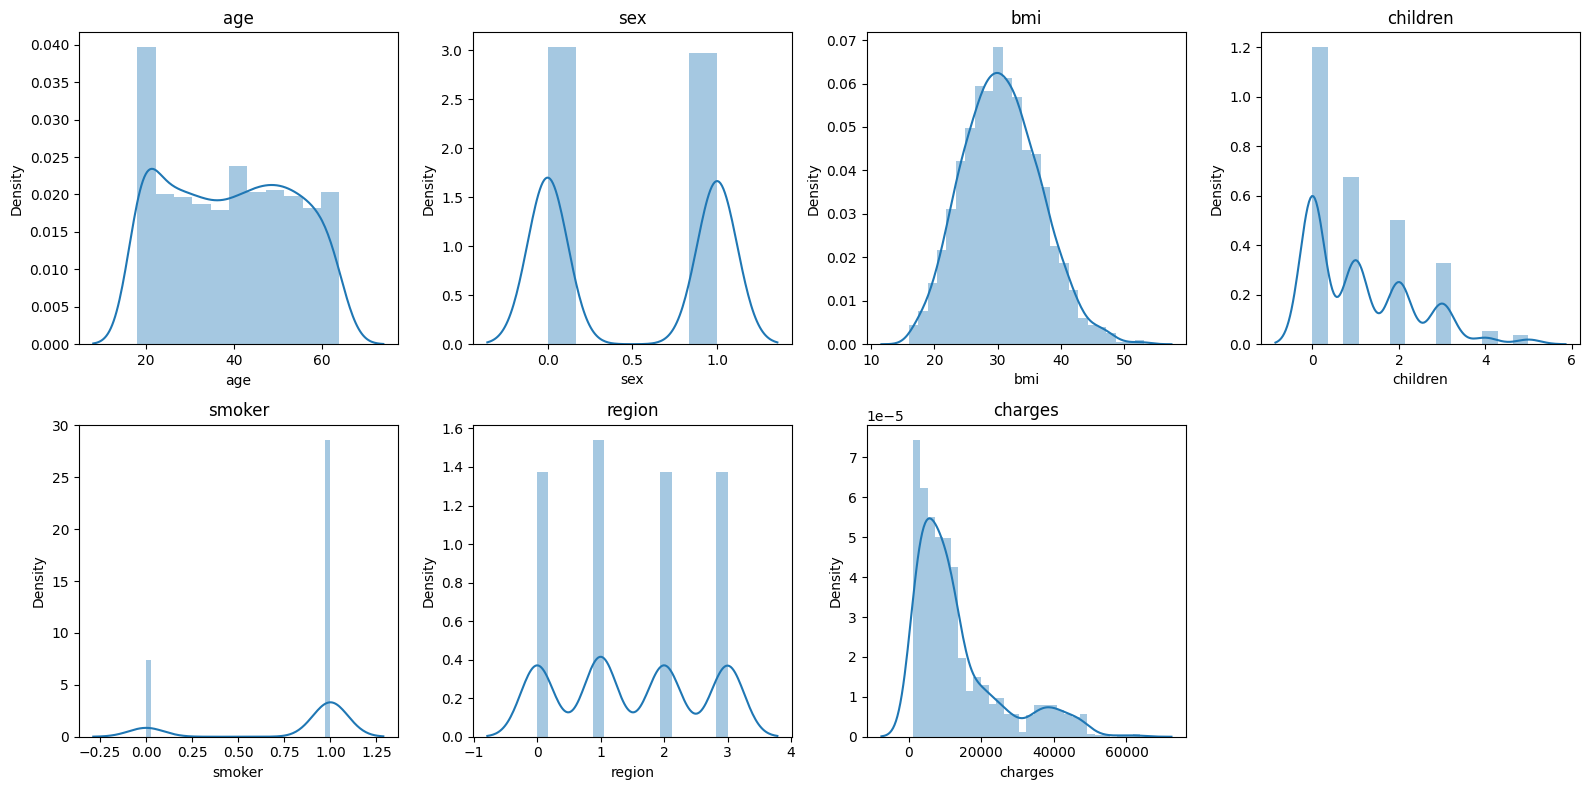

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()

num_cols = len(numerical_columns)
num_rows = num_cols // 4
num_rows += num_rows % 4

position = range(1, num_cols+1)

fig = plt.figure(figsize=(16, num_rows*4))
for k, col in zip(position, numerical_columns):
  ax = fig.add_subplot(num_rows, 4, k)
  sns.distplot(df[col], ax=ax)
  ax.set_title(col)

plt.tight_layout()
plt.show()

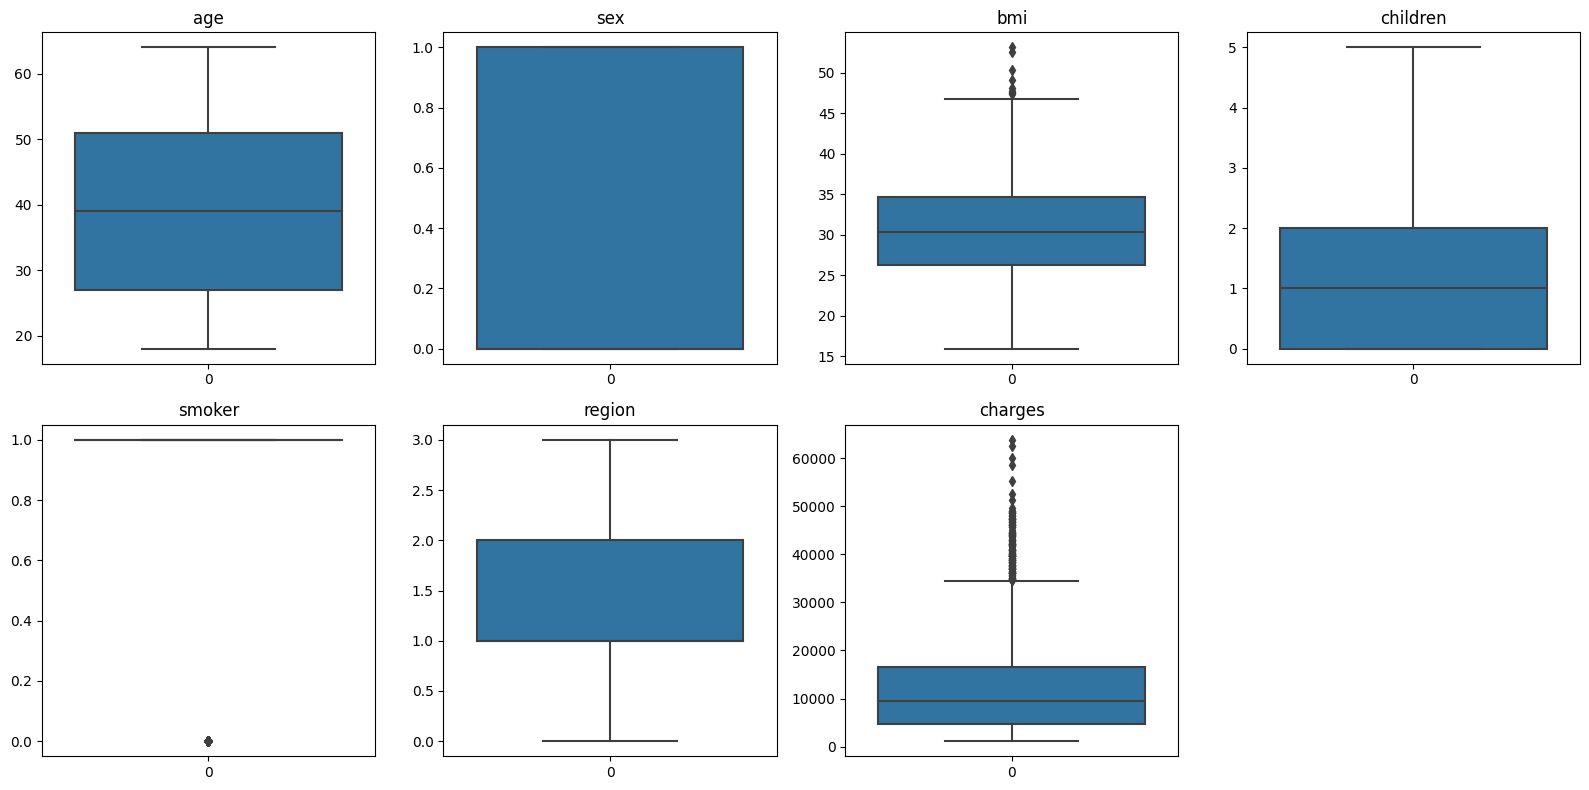

In [34]:
fig = plt.figure(figsize=(16, num_rows*4))
for k, col in zip(position, numerical_columns):
  ax = fig.add_subplot(num_rows, 4, k)
  sns.boxplot(df[col], ax=ax)
  ax.set_title(col)

plt.tight_layout()
plt.show()

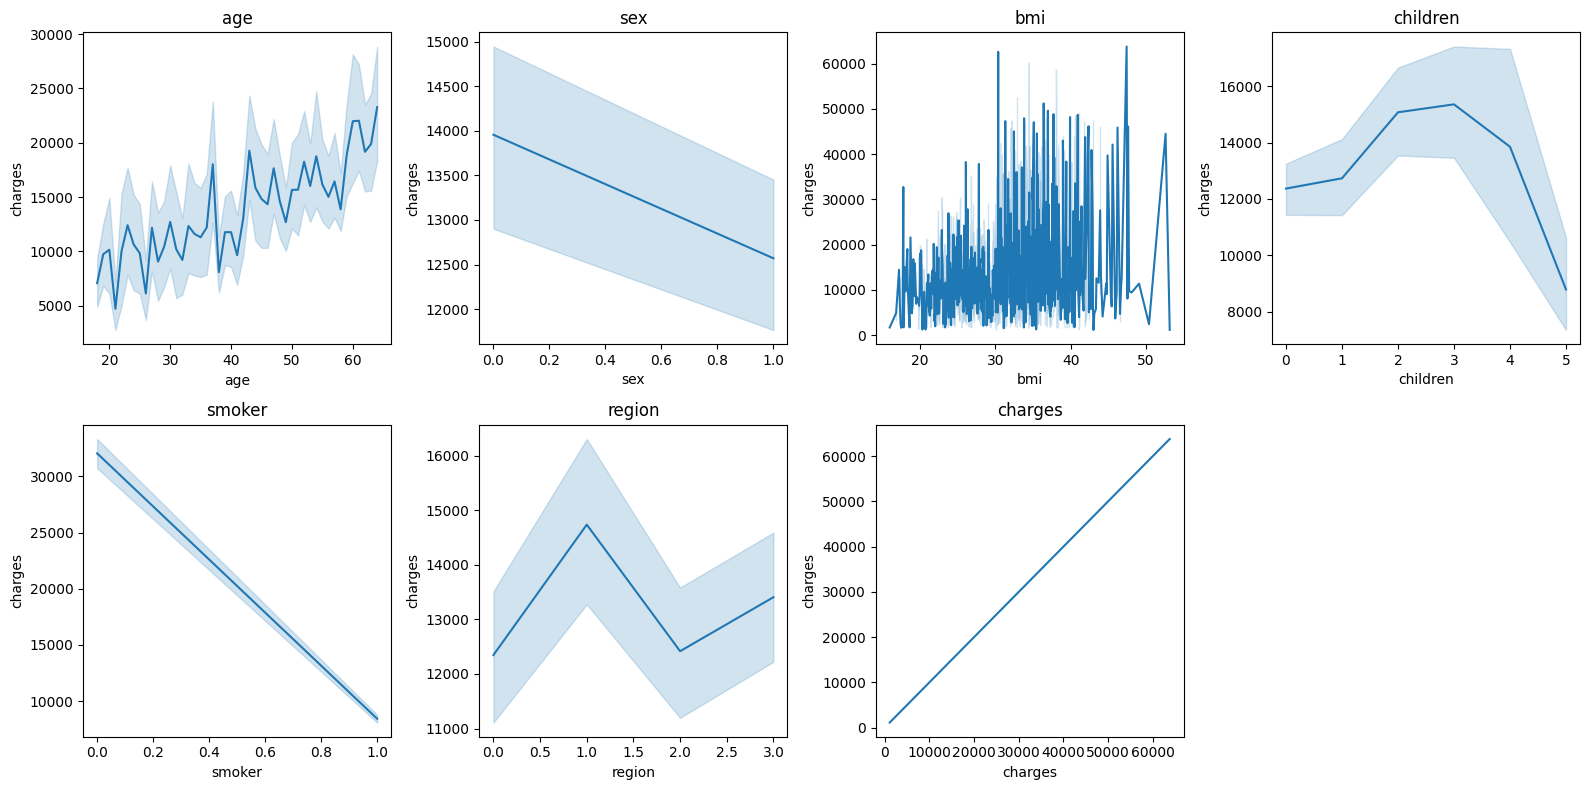

In [35]:
fig = plt.figure(figsize=(16, num_rows*4))
for k, col in zip(position, numerical_columns):
  ax = fig.add_subplot(num_rows, 4, k)
  sns.lineplot(data=df, x=col, y='charges', ax=ax)
  ax.set_title(col)

plt.tight_layout()
plt.show()

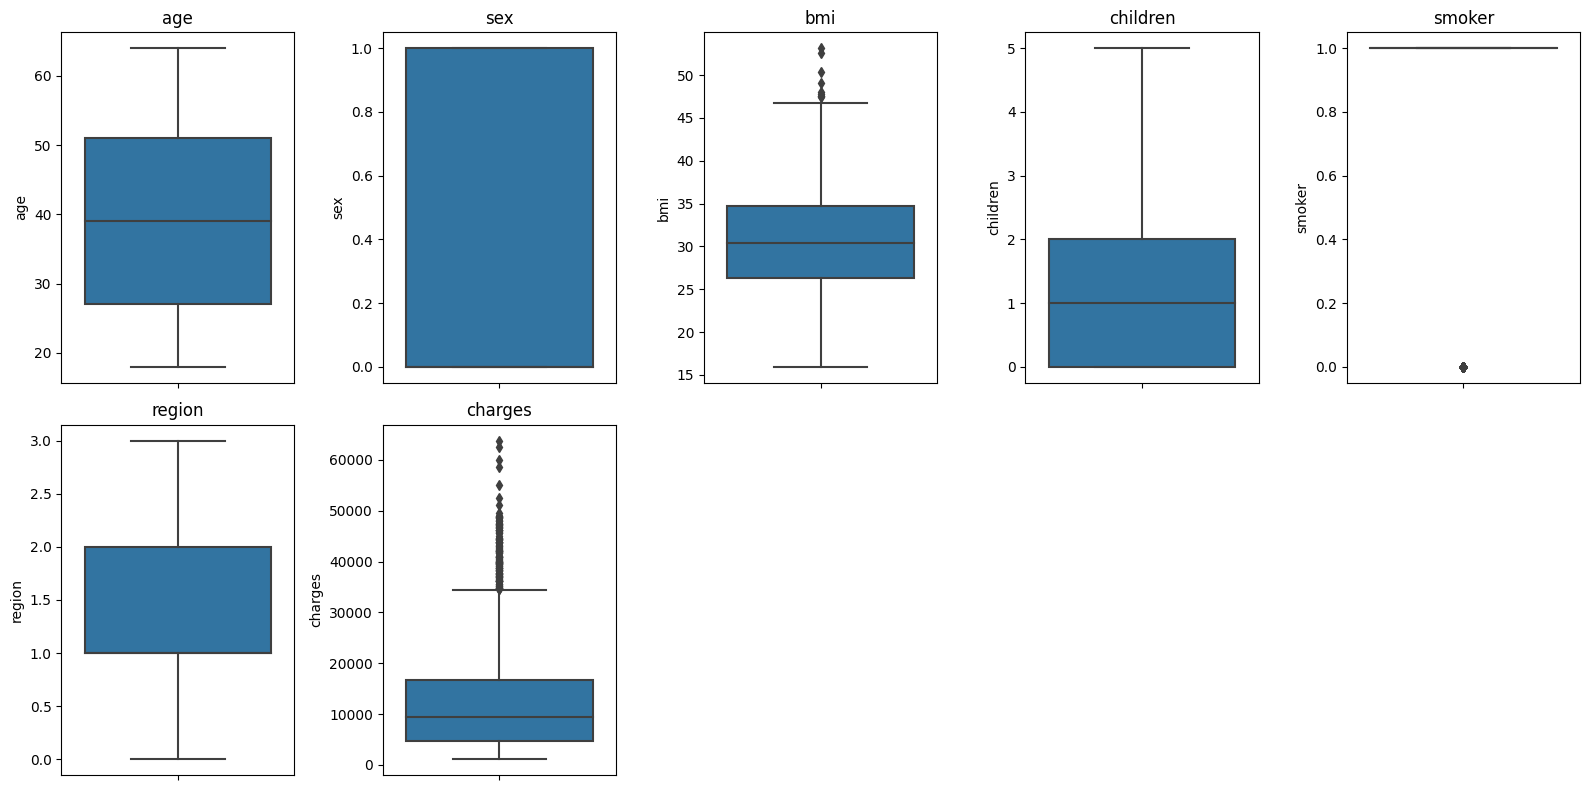

In [38]:
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
num_cols = len(numerical_columns)
num_rows = num_cols // 4
num_rows += num_rows % 4
position = range(1, num_cols+1)


fig = plt.figure(figsize=(16, num_rows * 4))
#서브플롯으로 boxplot 그리기

for k, col in zip(position, numerical_columns):
  ax = fig.add_subplot(num_rows, 5, k)

  sns.boxplot(data=df, ax=ax, y=col)
  ax.set_title(col)

plt.tight_layout()
plt.show()

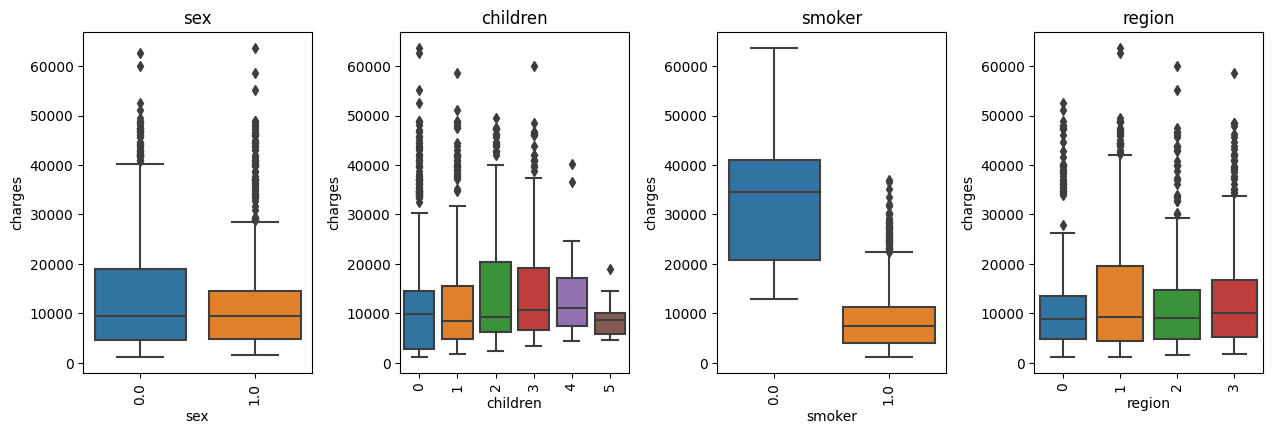

In [39]:
categorical_columns = ['sex', 'children', 'smoker', 'region']
num_cols = len(categorical_columns)
num_rows = num_cols // 4
num_rows += num_rows % 4
position = range(1, num_cols+1)


fig = plt.figure(figsize=(16, num_rows * 4))
#서브플롯으로 boxplot 그리기

for k, col in zip(position, categorical_columns):
  ax = fig.add_subplot(num_rows, 5, k)

  sns.boxplot(data=df, ax=ax, x=col, y='charges')
  ax.set_title(col)
  ax.tick_params(axis='x',
                 rotation=90)

plt.tight_layout()
plt.show()

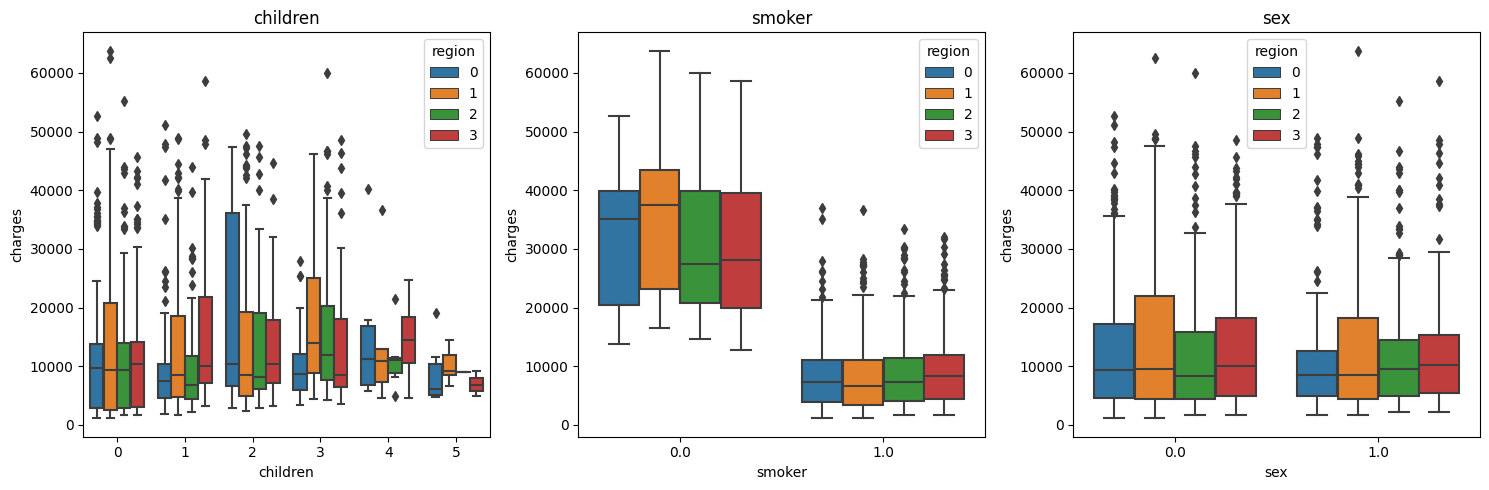

In [40]:
categorical_columns = ['children', 'smoker','sex']



fig = plt.figure(figsize=(15, 5))
#서브플롯으로 boxplot 그리기

for i, col in enumerate(categorical_columns):
  ax = fig.add_subplot(1, 3, i+1)

  sns.boxplot(data=df, ax=ax, x=col, hue='region', y='charges')
  ax.set_title(col)


plt.tight_layout()
plt.show()

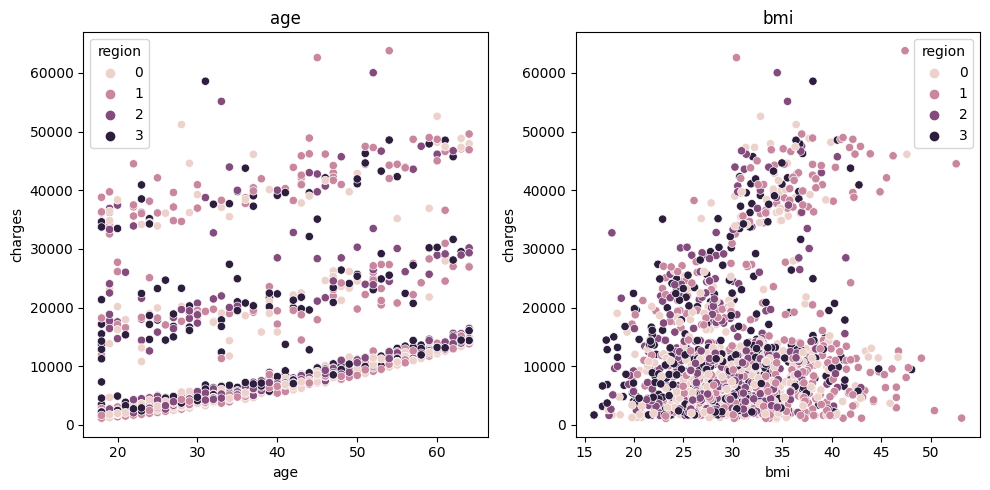

In [41]:
numerical_columns = ['age', 'bmi']

fig = plt.figure(figsize=(10, 5))
for i, col in enumerate(numerical_columns):
    ax = fig.add_subplot(1, 2, i+1)
    ax.set_title(col)
    sns.scatterplot(data=df, ax=ax, x=col, hue='region', y='charges')


plt.tight_layout()
plt.show()


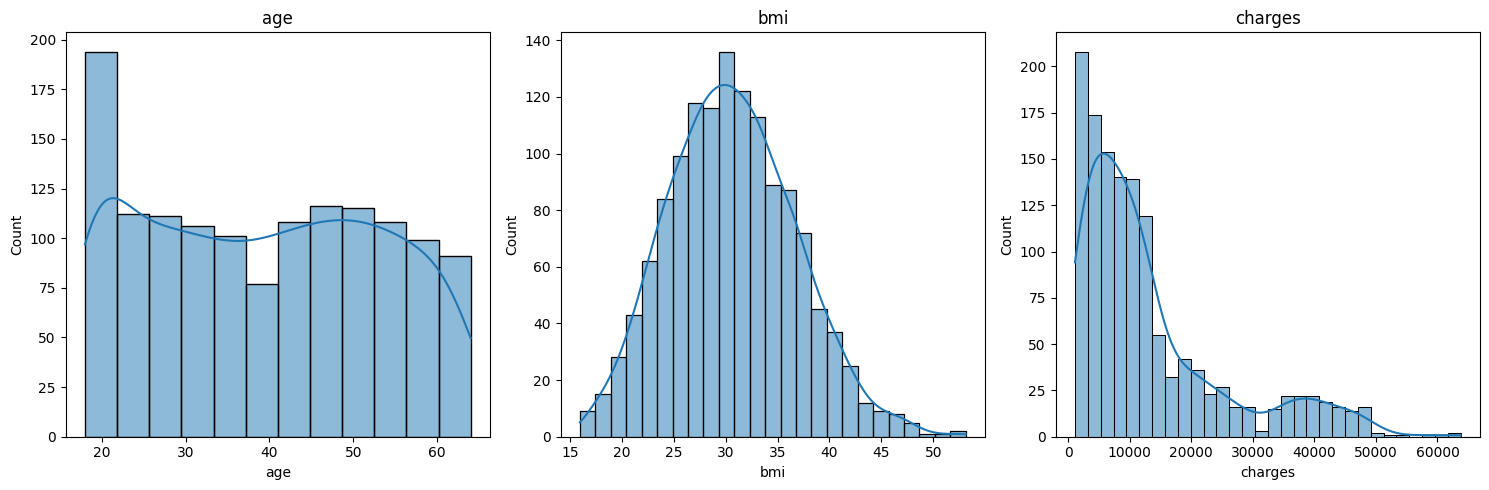

In [ ]:
numerical_columns = ['age', 'bmi', 'charges']

fig = plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_columns):
    ax = fig.add_subplot(1, 3, i+1)
    ax.set_title(col)
    sns.histplot(x=df[col], ax=ax, kde=True)


plt.tight_layout()
plt.show()

<Axes: xlabel='children', ylabel='count'>

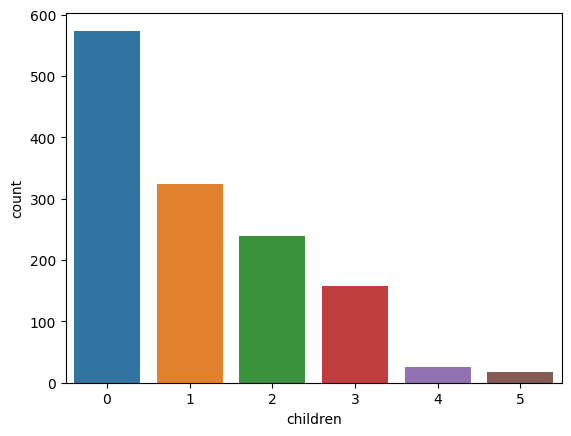

In [ ]:
sns.countplot(x=df['children'])

In [ ]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

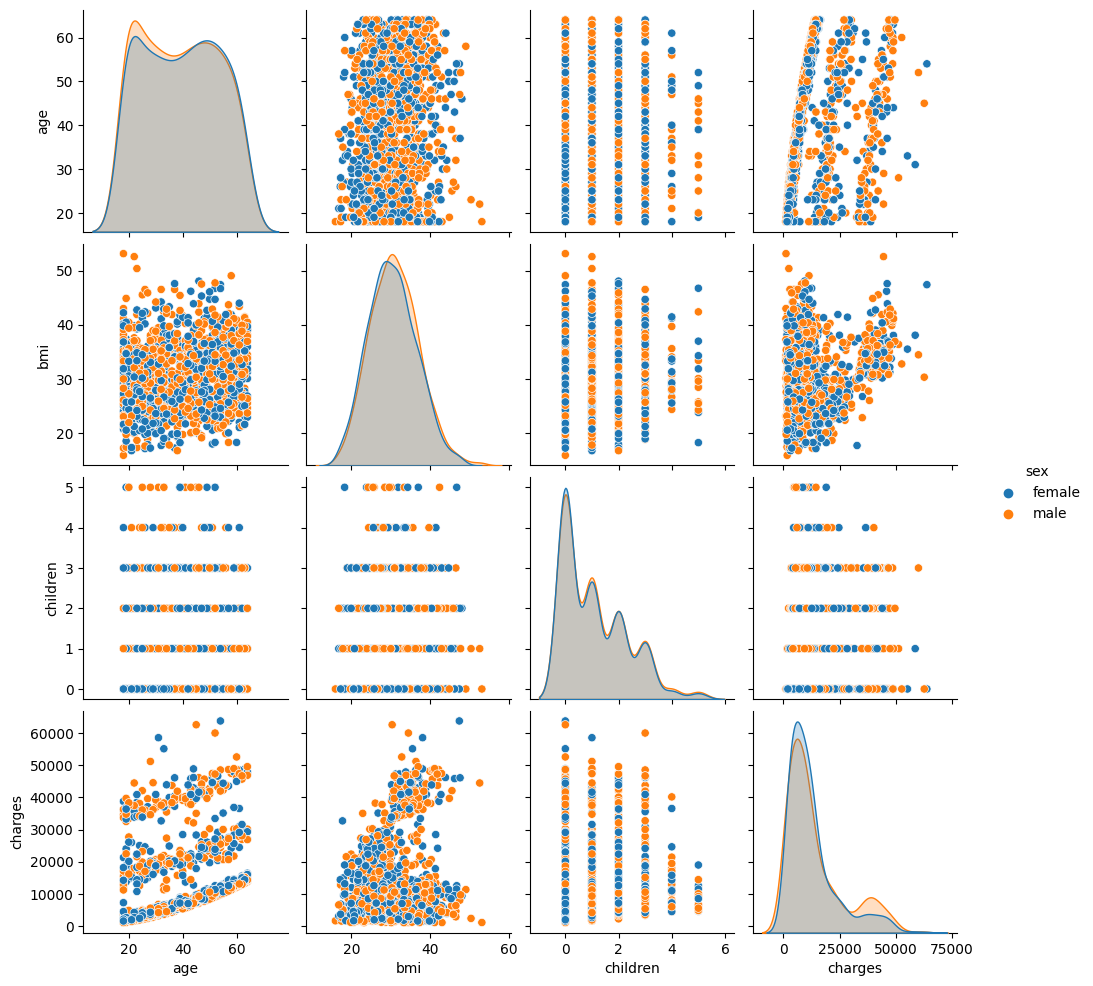

In [ ]:
sns.pairplot(df, hue='sex')

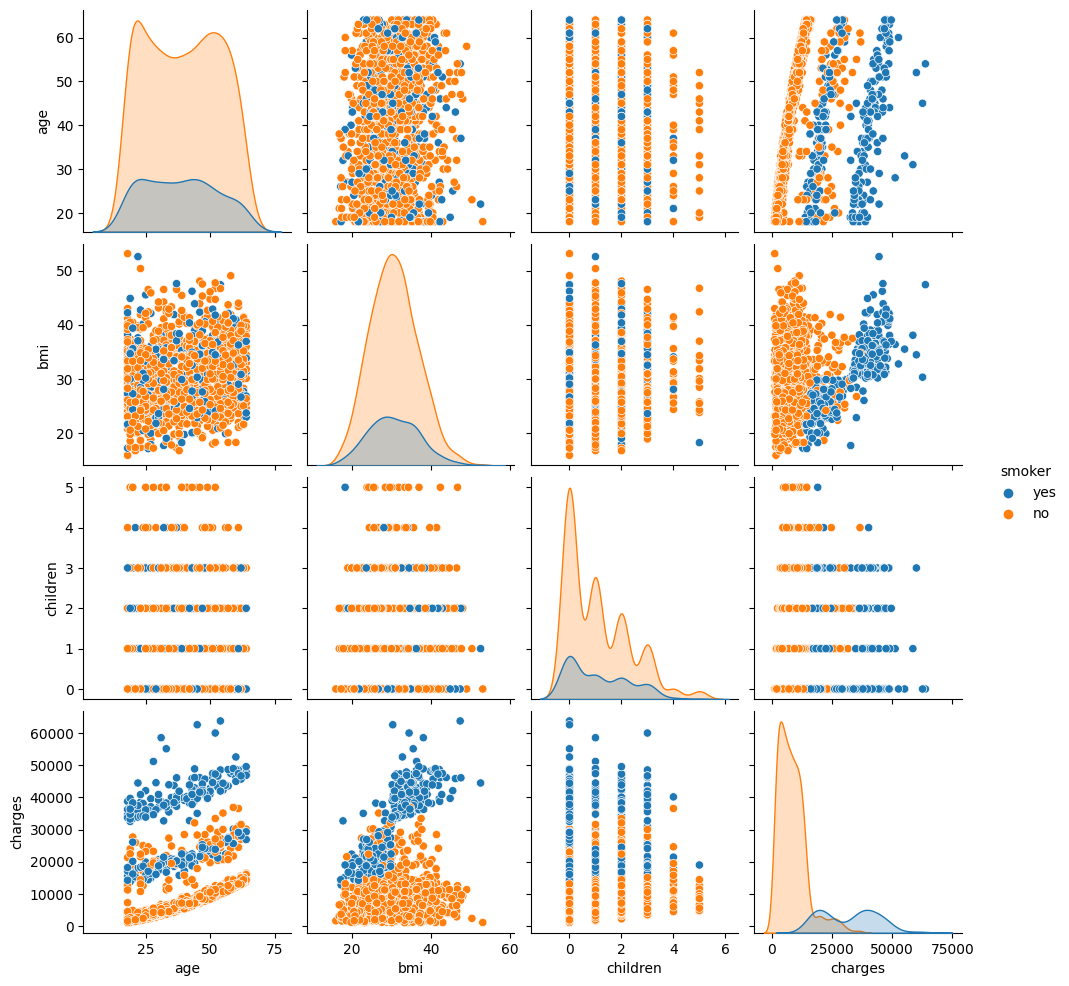

In [ ]:
sns.pairplot(df, hue='smoker')

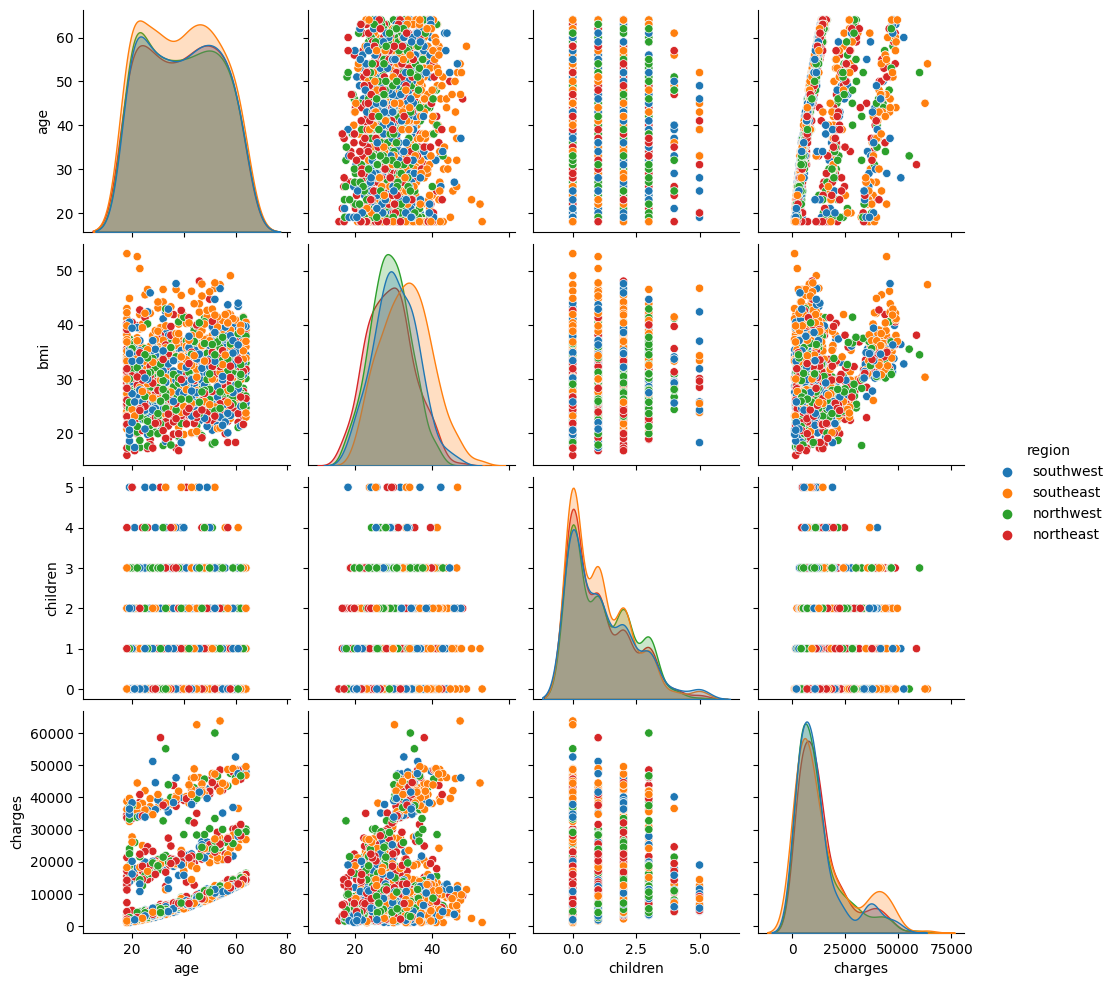

In [ ]:
sns.pairplot(df, hue='region')

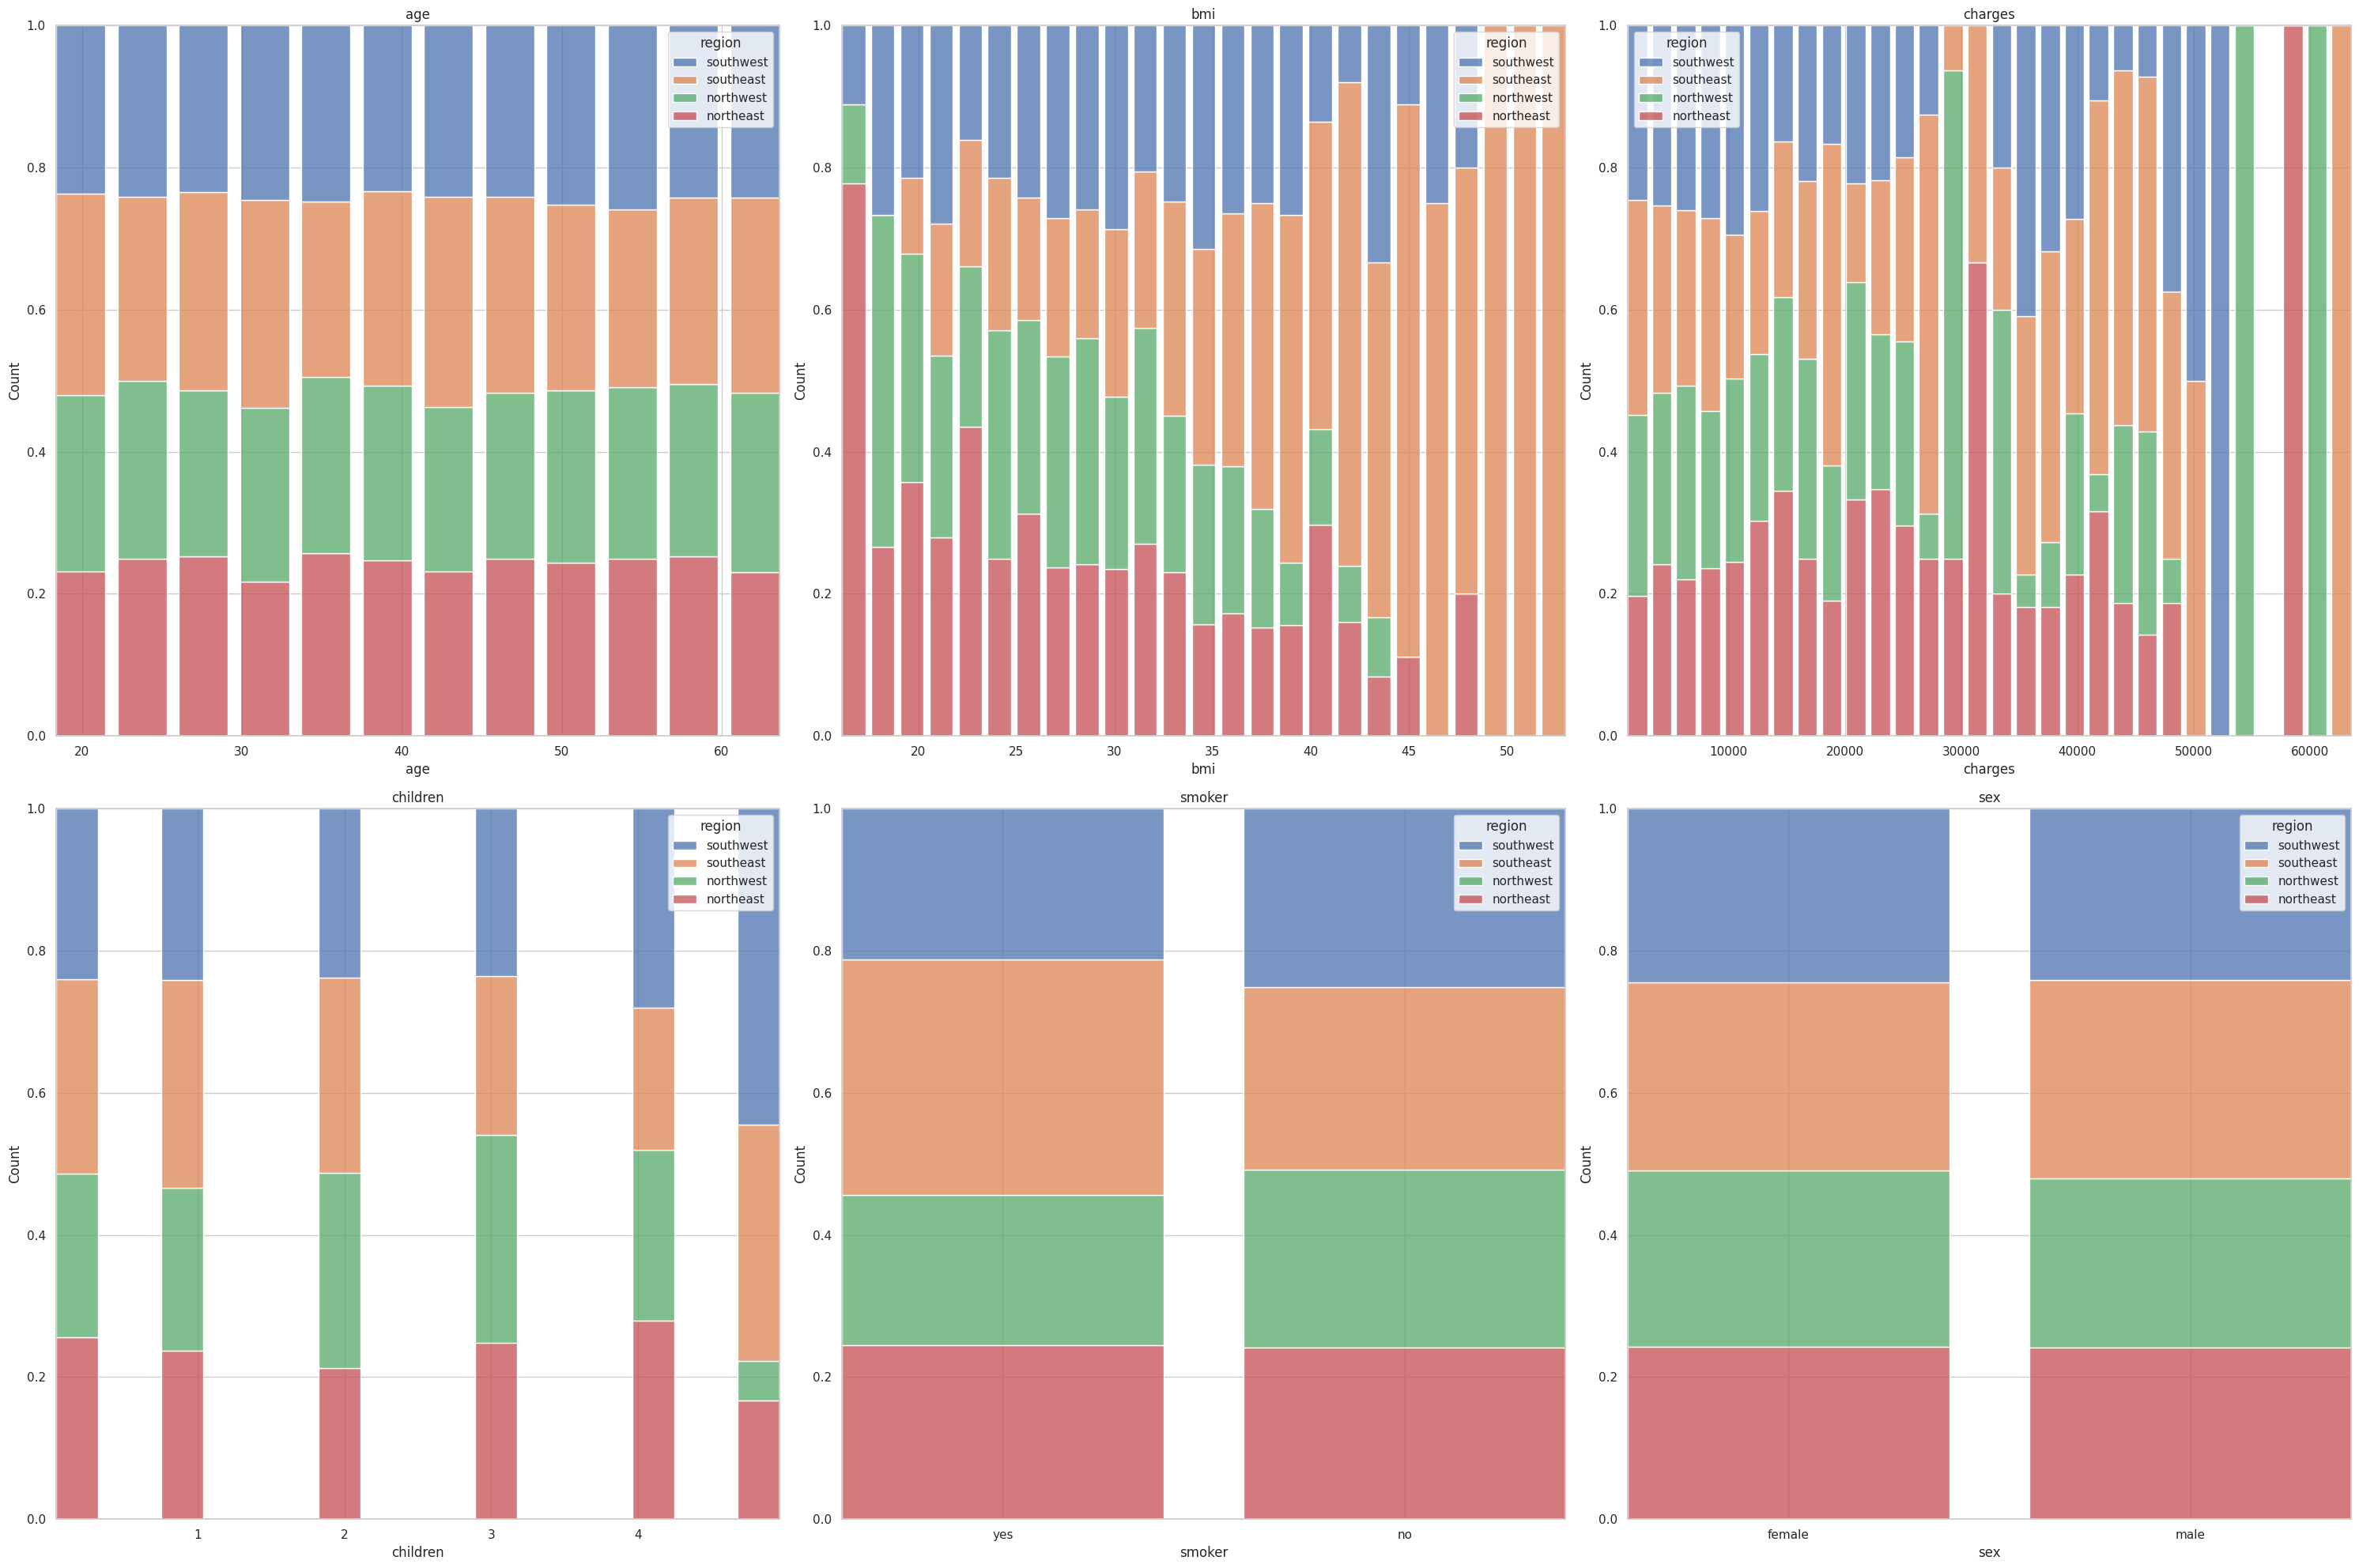

In [ ]:
numerical_columns = ['age', 'bmi', 'charges', 'children', 'smoker', 'sex']

fig = plt.figure(figsize=(30, 20))
for i, col in enumerate(numerical_columns):
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_title(col)
    sns.histplot(x=df[col], hue=df['region'], multiple="fill", shrink=0.8)


plt.tight_layout()
plt.show()


# get_dummies로 엔코더 실시 (범주형 데이터 수치화)

In [42]:
dum = pd.get_dummies(df['region'], dtype=float)

In [43]:
all = [df, dum]
df = pd.concat(all, axis=1)
df.drop(['region'], inplace=True, axis=1)

<ipython-input-44-fa735dcc40c0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='Blues')


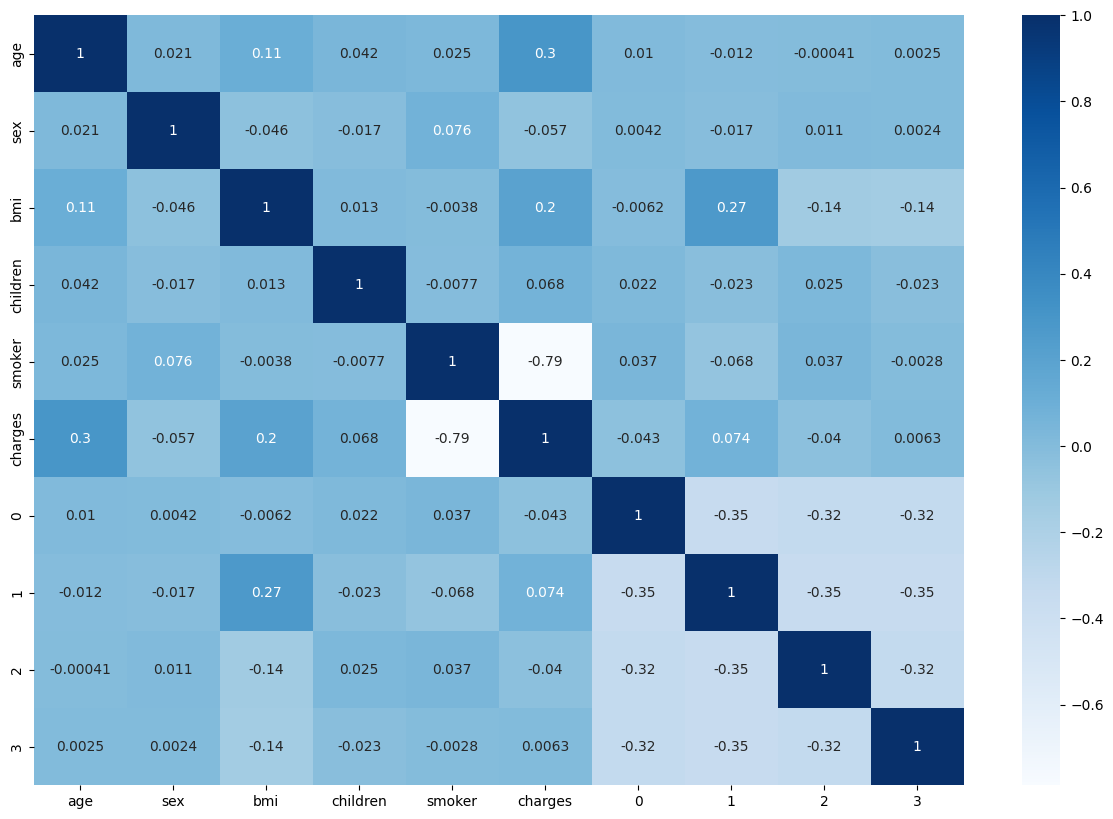

In [44]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.show()

In [45]:
df.describe()

,age,sex,bmi,children,smoker,charges,0,1,2,3
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.795217,13270.422265,0.242900,0.272048,0.242900,0.242152
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237,0.428995,0.445181,0.428995,0.428546
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,26.296250,0.000000,1.000000,4740.287150,0.000000,0.000000,0.000000,0.000000
50%,39.000000,0.000000,30.400000,1.000000,1.000000,9382.033000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,1.000000,34.693750,2.000000,1.000000,16639.912515,0.000000,1.000000,0.000000,0.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010,1.000000,1.000000,1.000000,1.000000


# Train, Test 분리 실시



## 비용을 타켓 피쳐로 회귀모델 실시

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   float64
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   float64
 5   charges   1338 non-null   float64
 6   age_cate  1338 non-null   object 
 7   0         1338 non-null   float64
 8   1         1338 non-null   float64
 9   2         1338 non-null   float64
 10  3         1338 non-null   float64
dtypes: float64(8), int64(2), object(1)
memory usage: 115.1+ KB


In [64]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'age_cate', 0, 1,
       2, 3],
      dtype='object')

In [65]:
X = df.drop(['charges', 'age_cate',0, 1, 2, 3,], axis=1)
y = df['charges']

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print("X_train", X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)

X_train (936, 5)
y_train (936,)
X_test (402, 5)
y_test (402,)


# ML models

##LinearRegression

In [67]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

print('선형회귀모델의 계수 : ', lm.intercept_)
print('선형회귀모델의 절편 : ', lm.coef_)

선형회귀모델의 계수 :  12645.533770394011
선형회귀모델의 절편 :  [   252.33666642    265.73101397    306.88025581    344.3662645
 -24050.20408698]


In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print("X_train", X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)

X_train (936, 5)
y_train (936,)
X_test (402, 5)
y_test (402,)


##KNeighborsRegressor

In [70]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)


print('MSE : ', mean_squared_error(y_test, y_pred))
print('MAE : ',mean_absolute_error(y_test, y_pred))
print('r2 score : ',r2_score(y_test, y_pred))

MSE :  121249946.22857465
MAE :  7765.824876481094
r2 score :  0.14442003377894252


##DecisionTreeRegressor

In [71]:
from sklearn.tree import DecisionTreeRegressor

dtm = DecisionTreeRegressor(random_state=1)
dtm.fit(X_train, y_train)

y_pred = dtm.predict(X_test)

print('MSE : ', mean_squared_error(y_test, y_pred))
print('MAE : ',mean_absolute_error(y_test, y_pred))
print('r2 score : ',r2_score(y_test, y_pred))

MSE :  49159120.54163505
MAE :  3539.289616915423
r2 score :  0.6531168878773742


##RandomForestRegressor

In [72]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=10 , random_state=1)

rf.fit(X_train, y_train)

y_pred_train = rf.predict(X_train)
y_pred_test  = rf.predict(X_test)

print("train MAE : ", mean_absolute_error(y_train, y_pred_train))
print("train R2 : ",r2_score(y_train, y_pred_train))

print("test MAE : ", mean_absolute_error(y_test, y_pred_test))
print("test R2 : ", r2_score(y_test, y_pred_test))

train MAE :  1106.9980018549145
train R2 :  0.9661374072493634
test MAE :  2931.7904117706466
test R2 :  0.8036076494231523


## Residual errors 시각화

In [73]:
df3 = pd.DataFrame({'y_test' : y_test, 'y_pred_test' : y_pred_test, 'diff' : y_test-y_pred_test}).reset_index(drop=True)
df3.head()

,y_test,y_pred_test,diff
0,1646.4297,1330.835410,315.594290
1,11353.2276,16099.514461,-4746.286861
2,8798.5930,9161.869955,-363.276955
3,10381.4787,10827.357600,-445.878900
4,2103.0800,2020.587995,82.492005


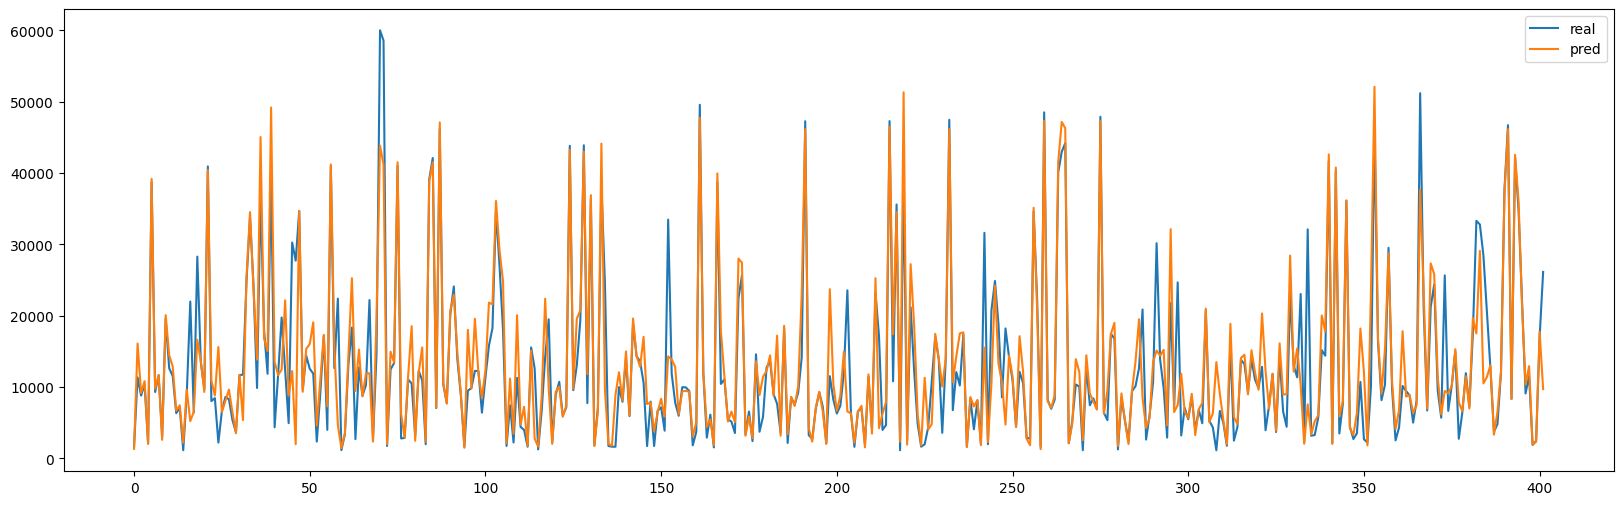

In [74]:
# 실제값과 예측값을 plot으로 시각화
plt.figure(figsize=(20,6))
plt.plot(df3["y_test"][:500],label="real")
plt.plot(df3["y_pred_test"][:500],label="pred")
plt.legend()
plt.show()

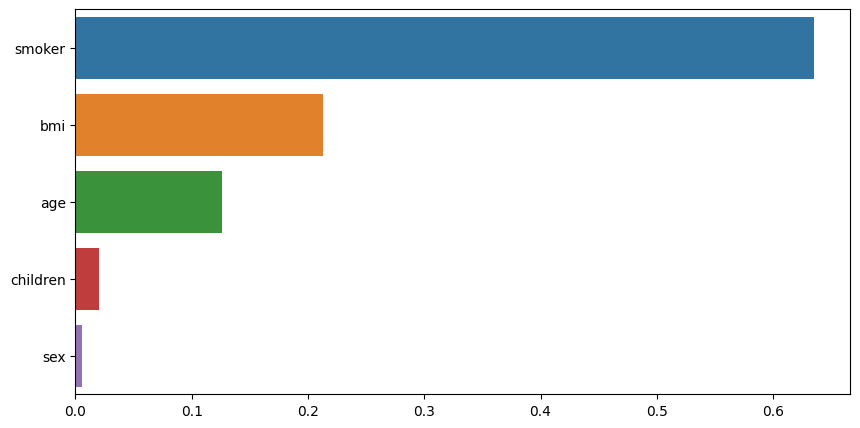

In [75]:
#feature_importances_ 를 시리즈로 출력 (인덱스는 칼럼명)
s_f_i = pd.Series(rf.feature_importances_, index=X_train.columns)
s_f_i.sort_values(ascending=False, inplace=True)
plt.figure(figsize=(10,5))
sns.barplot(x=s_f_i, y=s_f_i.index)
plt.show()

## Pycaret.regression 전체 모델 실시

In [76]:
!pip install pycaret
!pip install --upgrade pycaret scipy

  Using cached scipy-1.11.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (36.4 MB)


In [77]:
from pycaret.regression import *
sup = setup(df, target='charges', train_size=0.7)

,Description,Value
0,Session id,5315
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 11)"
4,Transformed data shape,"(1338, 20)"
5,Transformed train set shape,"(936, 20)"
6,Transformed test set shape,"(402, 20)"
7,Numeric features,9
8,Categorical features,1
9,Preprocess,True


In [78]:
comp = compare_models(sort='R2')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2574.9030,21399027.2907,4558.9154,0.8498,0.4177,0.2850,0.1050
rf,Random Forest Regressor,2631.0751,22879282.0811,4739.3878,0.8385,0.4288,0.2955,0.3420
lightgbm,Light Gradient Boosting Machine,2875.3751,23624376.1386,4817.8438,0.8330,0.5046,0.3380,0.3130
et,Extra Trees Regressor,2671.1381,26412116.2773,5103.5758,0.8121,0.4385,0.2791,0.1980
xgboost,Extreme Gradient Boosting,3036.4528,27118574.2000,5185.3215,0.8073,0.5089,0.3591,0.0830
ada,AdaBoost Regressor,4160.2208,27764101.2219,5248.7933,0.8030,0.6050,0.6759,0.0540
ridge,Ridge Regression,4248.3592,38050798.0995,6125.4218,0.7285,0.5704,0.4272,0.0410
br,Bayesian Ridge,4249.2462,38057565.6930,6126.0075,0.7284,0.5723,0.4273,0.0400
llar,Lasso Least Angle Regression,4235.8745,38056958.1814,6125.3405,0.7283,0.5561,0.4249,0.0450
lasso,Lasso Regression,4237.6678,38095653.1184,6128.3065,0.7279,0.5560,0.4250,0.0450


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

### create 모델

In [79]:
top1 = create_model('gbr', cross_validation=False)
top2 = create_model('rf', cross_validation=False)
top3 = create_model('lightgbm', cross_validation=False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,2644.6072,21045007.4371,4587.4838,0.8570,0.4376,0.3191


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,2959.5435,26773801.4784,5174.3407,0.8180,0.5004,0.3711


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,2929.0070,23303168.3159,4827.3355,0.8416,0.5599,0.3855


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

### tune 모델

In [80]:
tuned_gbr = tune_model(top1, optimize='R2', n_iter=10)
tuned_rf = tune_model(top2, optimize='R2', n_iter=10)
tuned_lightgbm = tune_model(top3, optimize='R2', n_iter=10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3254.6675,21960177.0355,4686.1687,0.8743,0.4992,0.5039
1,3577.5809,27124977.8288,5208.1645,0.7946,0.5475,0.5147
2,4221.7924,38234054.4631,6183.3692,0.8099,0.5469,0.5439
3,4106.0128,37079737.4934,6089.3134,0.8046,0.5300,0.4986
4,3218.6129,23428589.1681,4840.3088,0.7849,0.4996,0.4509
5,3511.7376,27509383.4613,5244.9388,0.8069,0.5502,0.5217
6,2866.5725,13529030.6017,3678.1831,0.8775,0.4839,0.4911
7,3184.0175,17932098.7959,4234.6309,0.8777,0.4946,0.4922
8,3330.5909,23260467.3739,4822.9107,0.7756,0.5162,0.5079


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2022.6800,14071560.3916,3751.2079,0.9195,0.3343,0.2701
1,2651.9947,23983760.7707,4897.3218,0.8184,0.4543,0.2825
2,2950.1654,28778248.9299,5364.5362,0.8569,0.4117,0.2968
3,3135.3735,30079681.5949,5484.4947,0.8415,0.4453,0.2965
4,2536.2680,21889904.3927,4678.6648,0.7990,0.4023,0.2499
5,2676.4518,24079214.2348,4907.0576,0.8310,0.4507,0.2787
6,1922.5636,9927091.7435,3150.7288,0.9101,0.3584,0.2576
7,2295.4214,13497063.1858,3673.8349,0.9079,0.3832,0.3115
8,2512.4246,19011887.9395,4360.2624,0.8165,0.3969,0.2853


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2471.7745,16250706.1763,4031.2165,0.9070,0.3820,0.3297
1,3018.6423,26221861.0668,5120.7286,0.8015,0.5566,0.3434
2,3406.2941,34929470.3929,5910.1159,0.8264,0.5779,0.3293
3,3026.7697,28293023.5208,5319.1187,0.8509,0.4541,0.2904
4,2971.6392,24152298.7071,4914.4988,0.7783,0.4492,0.2881
5,2977.3961,26967938.9509,5193.0664,0.8107,0.5765,0.3135
6,2613.7067,13427432.9149,3664.3462,0.8784,0.4809,0.3835
7,2844.8774,17526777.4841,4186.4994,0.8804,0.5765,0.3716
8,2728.9366,19990364.1156,4471.0585,0.8071,0.3892,0.2854


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


### blend 모델

In [81]:
blender_specific = blend_models(estimator_list=[tuned_gbr, tuned_rf, tuned_lightgbm], optimize='R2')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2101.1295,14341194.4977,3786.9770,0.9179,0.3401,0.2793
1,2731.7740,24794876.2471,4979.4454,0.8123,0.4923,0.2961
2,2987.8991,30714225.5551,5542.0416,0.8473,0.4070,0.2784
3,2950.2914,28112041.2749,5302.0790,0.8518,0.4216,0.2706
4,2587.6449,21951884.1935,4685.2838,0.7985,0.4051,0.2483
5,2586.5218,24265399.4566,4925.9922,0.8297,0.4666,0.2621
6,2107.7305,10531693.0661,3245.2570,0.9046,0.3851,0.3048
7,2325.9600,13096033.1617,3618.8442,0.9107,0.3616,0.2987
8,2519.5738,18817806.6378,4337.9496,0.8184,0.3787,0.2739


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

###predict 모델

In [82]:
final_model = finalize_model(blender_specific)
pred = predict_model(final_model, data=df)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,2014.4700,13666821.9642,3696.8665,0.9067,0.3303,0.2350


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0


## 흡연여부 분류모델 실시

In [83]:
from pycaret.classification import *
clf = setup(df, target='smoker', train_size=0.7)

,Description,Value
0,Session id,287
1,Target,smoker
2,Target type,Binary
3,Original data shape,"(1338, 11)"
4,Transformed data shape,"(1338, 20)"
5,Transformed train set shape,"(936, 20)"
6,Transformed test set shape,"(402, 20)"
7,Numeric features,9
8,Categorical features,1
9,Preprocess,True


In [84]:
best_models = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9583,0.9905,0.9651,0.9823,0.9735,0.8757,0.8775,0.3000
xgboost,Extreme Gradient Boosting,0.9572,0.9877,0.9691,0.9771,0.9729,0.8707,0.8721,0.0690
gbc,Gradient Boosting Classifier,0.9562,0.9862,0.9651,0.9800,0.9722,0.8687,0.8715,0.1400
dt,Decision Tree Classifier,0.9551,0.9348,0.9691,0.9745,0.9717,0.8634,0.8646,0.0480
ada,Ada Boost Classifier,0.9423,0.9850,0.9651,0.9629,0.9638,0.8215,0.8236,0.1490
rf,Random Forest Classifier,0.9369,0.9819,0.9489,0.9715,0.9599,0.8124,0.8153,0.3040
lr,Logistic Regression,0.9348,0.9842,0.9638,0.9554,0.9593,0.7953,0.7988,0.0630
knn,K Neighbors Classifier,0.9241,0.9633,0.9502,0.9547,0.9522,0.7680,0.7705,0.0500
lda,Linear Discriminant Analysis,0.9231,0.9822,0.9611,0.9442,0.9522,0.7551,0.7603,0.0510
nb,Naive Bayes,0.9113,0.9760,0.9544,0.9362,0.9448,0.7175,0.7223,0.0480


Processing:   0%|          | 0/65 [00:00<?, ?it/s]